<div style="text-align:center">
    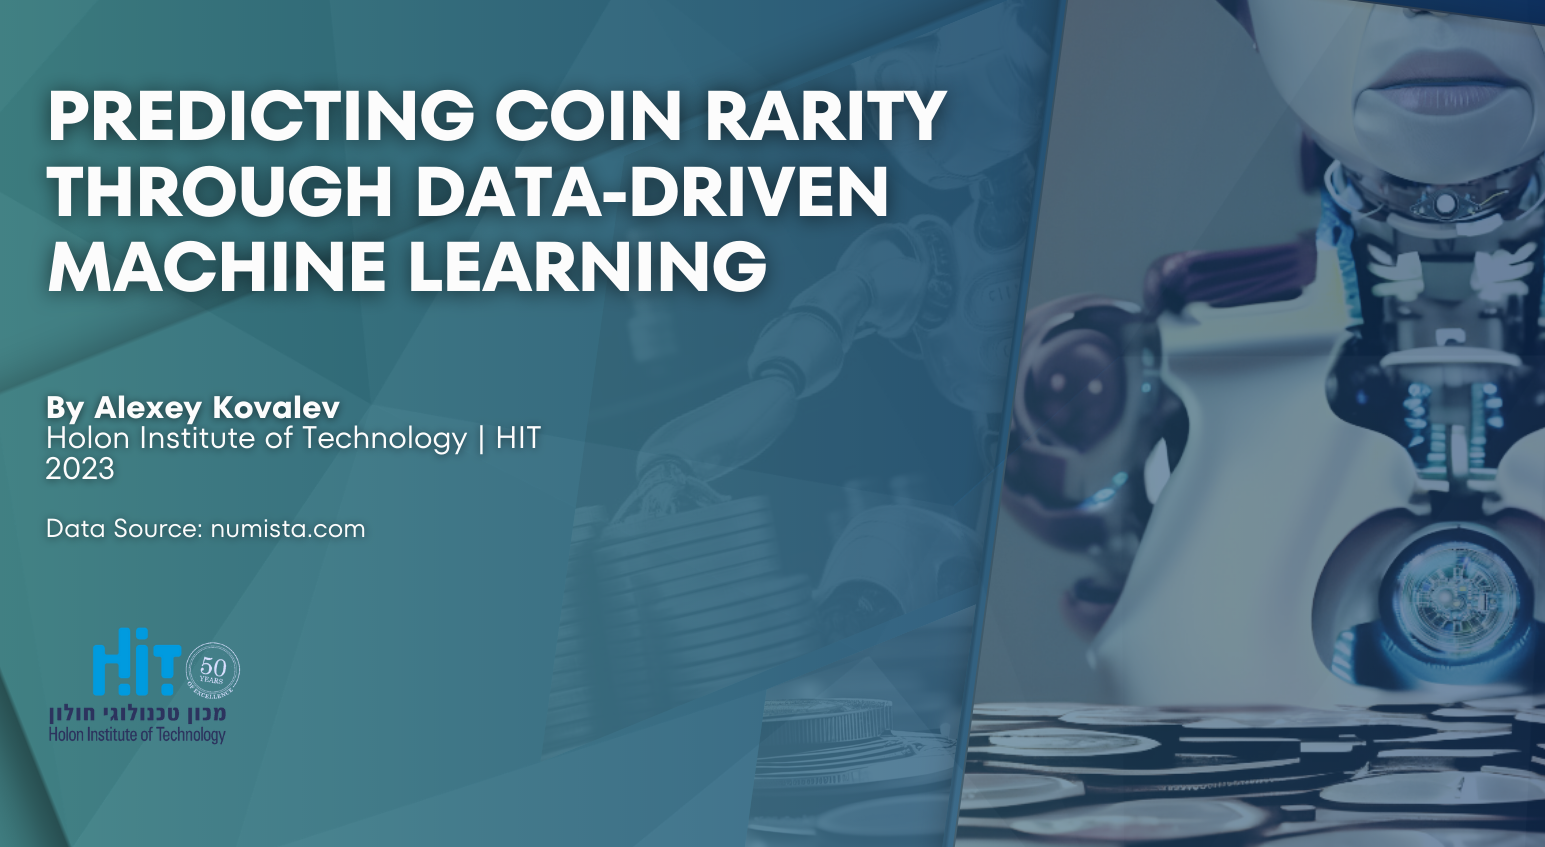
</div>

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Introduction</h1>

<p style="font-family: Arial, sans-serif; color: #555555; text-align: justify;">This research project aims to leverage machine learning techniques to predict the rarity of coins based on various parameters.<br>By constructing a predictive model, the objective is to gain valuable insights into the factors contributing to coin rarity and enhance our understanding of the coin collecting market. It is important to note that this project caters to casual coin collectors who seek a deeper comprehension of coin rarity, rather than seasoned collectors already possessing extensive knowledge in this domain.</p>

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Research Question</h1>

<p style="font-family: Arial, sans-serif; color: #555555; text-align: justify;">Can machine learning accurately predict coin rarity based on coin parameters?</p>

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Dataset</h1>

<p style="font-family: Arial, sans-serif; color: #555555; text-align: justify;">The dataset employed in this project encompasses approximately 22,000 unique coins, extracted through a custom web crawler script from the <a href="https://en.numista.com/" style="color: #0088cc; text-decoration: none;">Numista</a> website. The web crawler comprehensively scans each coin page, collecting attributes such as title, edge type, mintage, composition, special engravings, and more. It ensures the inclusion of any additional parameters that may not have been previously encountered, thus guaranteeing comprehensive data collection. Missing values will be appropriately handled during preprocessing. This dataset provides a comprehensive representation of coin characteristics, forming the foundation for training and evaluating the rarity prediction models.</p>

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Methods</h1>

<p style="font-family: Arial, sans-serif; color: #555555; text-align: justify;">In this research project, a combination of supervised learning techniques and feature engineering methodologies will be employed. Decision trees, random forests, logistic regression, and support vector machines will be utilized to capture intricate relationships and patterns within the dataset, facilitating the development of accurate models for predicting coin rarity.</p>

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Conclusion</h1>

<p style="font-family: Arial, sans-serif; color: #555555; text-align: justify;">This research project successfully employed machine learning techniques to predict the rarity of coins based on various parameters. By leveraging a dataset comprising coin attributes collected using a custom web crawler script, accurate rarity prediction models were developed. The analysis revealed valuable insights into the factors contributing to coin rarity and enhanced our understanding of the coin collecting market.</p>

<p style="font-family: Arial, sans-serif; color: #555555; text-align: justify;">The outcomes of this project provide valuable assistance to casual coin collectors who seek a deeper understanding of coin rarity. The developed models can support collectors in making more informed decisions regarding coin acquisition and trading. Additionally, the research contributes to the broader field of coin collecting by advancing our knowledge of the factors influencing coin rarity and the application of machine learning in this domain.</p>

</div>


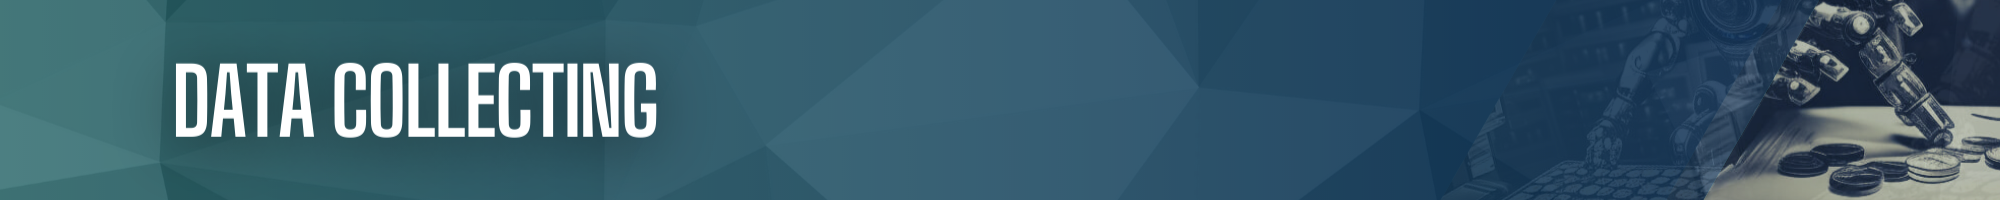

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Gameplan</h1>

<ul style="font-family: Arial, sans-serif; color: #555555;">
    <li><strong>Acquiring the Proper HTML Responses:</strong> Obtain the necessary HTML responses from the <a href="https://en.numista.com/" style="color: #0088cc; text-decoration: none;">Numista</a> website.</li>
    <li><strong>Investigating Website Structure:</strong> Carefully analyze the structure of the website and identify the specific elements that contain the desired data.</li>
    <li><strong>Setting up an Efficient Web Crawler:</strong> Establish a sophisticated and highly efficient web crawler to systematically gather the required information.</li>
    <li><strong>Handling Bugs and Roadblocks:</strong> Address any unexpected issues and overcome obstacles that may arise during the crawling process.</li>
    <li><strong>Executing the Web Crawler:</strong> Execute the web crawler to diligently collect the necessary data.</li>
</ul>

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Goal</h1>

<ul style="font-family: Arial, sans-serif; color: #555555;">
    <li><strong>Achieving a Comprehensive Dataset:</strong> Attain a dataset of considerable size, enriched with an abundant amount of data, to serve as the foundation for training machine learning models.</li>
</ul>

</div>



In [6]:
import requests
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from IPython.display import display, Code
import time
import datetime
import csv
import json
import math
import os
import warnings
from bs4 import BeautifulSoup
from pprint import pprint
from IPython.display import display
from collections import OrderedDict
from tabulate import tabulate

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Starting with a "soft" attempt to get a response .</span>

</div>

In [7]:
response = requests.get('https://en.numista.com/catalogue/index.php?ct=coin')
soup = BeautifulSoup(response.content, 'html.parser')
pprint(soup.prettify()) 

''


<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">The response received was a captcha test instead of the expected HTML.<br>Another request will be made, this time utilizing "headers" to emulate a browser request.</span>

</div>

In [8]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
response = requests.get('https://en.numista.com/catalogue/index.php?ct=coin', headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
html_code = soup.prettify()

display(Code(html_code, language='html'))

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;"> Better.<br>
Upon reviewing the data, it is evident that the list of locations is enclosed within an element called "liste_pays".<br>To proceed with the web-crawling process, I will aim to gather a collection of URL "tails" for appropriate configuration.</span>

</div>

In [9]:
ul_element = soup.find('ul', class_='liste_pays')

if ul_element is not None:
    a_tags = ul_element.find_all('a')
    locations = [a_tag['href'][:-6] for a_tag in a_tags] # remove the last 6 characters ('1.html') from each href
    pprint(locations)


<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;"> Excellent! Let's proceed with sorting the list.</span>

</div>

In [10]:
locations = list(set(locations))
locations.sort()
locations.pop(0) #The first element, after sorting, was found to be irrelevant 
pprint(locations)

NameError: name 'locations' is not defined

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;"> The list of URL "tails" has been prepared.<br>
        Next, these tails will be used to visit all the location pages on the website and collect the unique index of each coin.</span>

</div>

In [ ]:
# This is to handle potential instances of infinite loops encountered during the testing phase...
def is_duplicate(coin_id, existing_ids):
    for existing_id in existing_ids:
        if coin_id == existing_id:
            return True
    return False

In [ ]:
coin_ids = []  # Initialize a list to store the collected coin IDs
start_tme = datetime.datetime.now()  # Record the starting time

# Iterate through locations
for count, location in enumerate(locations, 1):
    page_num = 1  # Initialize the page number
    prev_coin_ids_len = len(coin_ids)  # Record the length of the coin IDs list
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"[{timestamp}]")

    # Start scraping pages
    while True:
        url = f"https://en.numista.com/{location}{page_num}.html"
        print(f"- Scraping page #{page_num} location #{count}/{len(locations)}: {url}")

        try:
            response = requests.get(url, headers=headers, allow_redirects=False)
            
            # Check response status code
            if response.status_code == 404:
                print(f"Invalid URL: {url}. Moving to next location.")
                break
            elif response.status_code == 302:
                print(f"Redirected URL: {url}. Moving to next page.")
                break
            else:
                soup = BeautifulSoup(response.content, 'html.parser')
                description_pieces = soup.find_all('div', {'class': 'description_piece'})
                
                # Extract coin IDs from the page
                for piece in description_pieces:
                    a_tags = piece.find_all('a')
                    for a in a_tags:
                        href = a['href']
                        start_index = href.find('pieces') + len('pieces') + 1
                        end_index = href.find('.html')
                        coin_id = href[start_index:end_index]
                        
                        # Check if the coin ID is a duplicate
                        if is_duplicate(coin_id, coin_ids):
                            print(f"Duplicate coin ID found: {coin_id}. Moving to next page.")
                            break
                        else:
                            coin_ids.append(coin_id)
                    else:
                        continue
                    break

                curr_coin_ids_len = len(coin_ids)
                
                # Check if there are more pages to scrape for the current location
                if curr_coin_ids_len == prev_coin_ids_len:
                    print(f"No more pages for '{location}'. Moving to next location.")
                    break
                else:
                    prev_coin_ids_len = curr_coin_ids_len
                    page_num += 1
                    time.sleep(0.5)
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while requesting {url}: {e}")
            break

    print(f"Collected {len(coin_ids)} coin IDs so far\n")

# Calculate elapsed time
elapsed_time = datetime.datetime.now() - start_time
elapsed_time_str = str(elapsed_time).split('.')[0]
print(f"\nFinished crawling {len(coin_ids)} URLs. Time taken: {elapsed_time_str}.\n")

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;"> The HTML structure of the "section" part is being explored to locate the desired elements.<br>
        Additionally, one of the pages (e.g., 'https://en.numista.com/catalogue/pieces8562.html') is being parsed to examine its content.</span>

</div>

In [ ]:
url = 'https://en.numista.com/catalogue/pieces8562.html'
response = requests.get(url, headers=headers, allow_redirects=False)
soup = BeautifulSoup(response.content, 'html.parser')
section = soup.find('section', {'id': 'fiche_caracteristiques'})
print(section.prettify())

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  The webpage features a well-structured table with valuable information.<br>The following code block demonstrates the extraction process for retrieving data from the table.</span>

</div>

In [ ]:
# Extracting data from the table
table = section

# Initializing variables
coin_data = {}
col_names = []

# Iterating through each row in the table
for row in table.find_all("tr"):
    # Extracting parameter name
    parameter_name = row.find("th").text.strip()
    
    # Extracting parameter value
    parameter_value = ""
    if row.find("a"):
        parameter_value = row.find("a").text.strip()
    elif row.find("td"):
        parameter_value = row.find("td").text.strip()

    # Adding parameter name to the list of column names if it's not already present
    if parameter_name not in col_names:
        col_names.append(parameter_name)
    
    # Storing parameter value in the coin_data dictionary
    coin_data[parameter_name] = parameter_value
    
# Creating a DataFrame from the collected data
df = pd.DataFrame(columns=col_names)
df.loc[0] = [coin_data.get(col_name, "") for col_name in col_names]

# Adjusting the index and column names
df.index = [url.split("/")[-1].replace("pieces", "").replace(".html", "")]
df = df.rename_axis("Index").reset_index()

# Displaying the DataFrame
display(df)


<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  This concludes the testing phase.<br>
        The current objective is to develop efficient functions for large-scale crawling, and ultimately executing the web crawler.</span>

</div>

In [ ]:
def scrape_title(soup):
    try:
        # Find the header element containing the main title
        header_element = soup.find('header', {'id': 'main_title'})
        # Extract the title text and remove any leading or trailing whitespace
        title = header_element.find('h1').text.strip()
        # Print confirmation that the title was successfully scraped
        print(f"- title: OK")
    except AttributeError:
        # Handle the case where the 'Title' element is not found
        print(f"Error: Failed to locate 'Title' element")
        # Assign NaN (not a number) to the title
        title = math.nan
    except Exception as e:
        # Handle any other exceptions that may occur during scraping
        print(f"Error: {e}. Failed to scrape 'Title'")
        # Assign NaN to the title
        title = math.nan
        
    # Return the scraped title
    return title


In [ ]:
"""
This function is designed to look for parameters I may have missed in the early analysis of the web page structure.
It iterates through each table row, extracting parameter names and values.
Hyperlinks or plain text values are assigned to corresponding parameters.
New parameter names are added to existing columns if not present.

"""

def scrape_characteristics(soup):
    try:
        # Find the table element containing characteristics
        table_element = soup.find('section', {'id': 'fiche_caracteristiques'}).find('table')
        
        # Initialize with default columns
        coin_data = {'Index': coin_id, 'Title': title, 'Rarity': rarity}
        col_names = ['Index', 'Title', 'Rarity']
        
        # Extract characteristics from each row
        for row in table_element.find_all("tr"):
            parameter_name = row.find("th").text.strip()
            parameter_value = math.nan
            
            # Check if value exists as a link or as a plain text
            if row.find("a"):
                parameter_value = row.find("a").text.strip()
            elif row.find("td"):
                parameter_value = row.find("td").text.strip()
            
            # Add new parameter to column names if it's not already present
            if parameter_name not in col_names:
                col_names.append(parameter_name)
                
            # Assign parameter value to coin data
            coin_data[parameter_name] = parameter_value
    except Exception as e:
        print(f"Error: {e}. Failed to scrape 'Table of characteristics'")
        # Return default columns and values in case of error
        coin_data = {'Index': coin_id, 'Title': title, 'Rarity': rarity}
        col_names = ['Index', 'Title', 'Rarity']
        
    # Print status
    print(f"- characteristics: OK")
    
    # Return scraped coin data and column names
    return coin_data, col_names


In [ ]:
def scrape_rarity(soup):
    try:
        # Find the div containing rarity information
        div = soup.find('div', style='padding:25px 0 5px 0')

        # Find the strong tag within the div
        strong = div.find('strong')

        # Extract the rarity text
        rarity = strong.text

        # Print status message
        print(f"- Rarity: OK")
    except Exception as e:
        # Handle exception and print error message
        print(f"Error: {e}. Failed to scrape 'Rarity'")
        rarity = math.nan

    # Return the rarity
    return rarity


In [ ]:
def scrape_edge(soup):
    try:
        # Find the section containing descriptions and locate the heading for 'Edge'
        edge_element = soup.find('section', {'id': 'fiche_descriptions'}).find('h3', text='Edge').find_next_sibling('p')
        
        # Extract the text of the next sibling paragraph if it exists, otherwise assign an empty string
        edge = edge_element.text.strip() if edge_element else ''
        
        # Print a message indicating successful scraping of 'Edge'
        print(f"- edge: OK")
    except Exception as e:
        # Print an error message if scraping fails and assign a value indicating failure
        print(f"Error: {e}. Failed to scrape 'Edge'")
        edge = math.nan
        
    return edge


In [ ]:
def scrape_engraver(soup):
    try:
        # Find the 'Engraver' element
        engraver_element = soup.find('section', {'id': 'fiche_descriptions'}).find('strong', text='Engraver:')
        
        if engraver_element:
            if engraver_element.find_next_sibling('span', class_='engraver_link'):
                # Extract the engraver from the sibling span element
                engraver = engraver_element.find_next_sibling('span', class_='engraver_link').text.strip()
            else:
                # Extract the engraver from the next sibling
                engraver = engraver_element.next_sibling.strip()
                
            # Print success message
            print(f"- engraver: OK")
        else:
            # Handle case when 'Engraver' element is not found
            engraver = math.nan
    except AttributeError:
        # Handle attribute error when 'Engraver' element is not located
        print(f"Error: Failed to locate 'Engraver' element")
        engraver = math.nan
    except Exception as e:
        # Handle any other exceptions during scraping
        print(f"Error: {e}. Failed to scrape 'Engraver'")
        engraver = math.nan
    
    # Return the extracted engraver
    return engraver


In [ ]:
"""
This function incorporates early feature engineering techniques. 
Specifically, the 'Times Issued' column of the dataset is dynamically generated during 
the scraping process for the 'Mintage' column.

""" 

def scrape_coin_mintage(soup):
    # Find all elements with the class "tirage"
    mintage_elements = soup.select("td.tirage")

    # If no mintage elements found, return None for mintage and 0 for numeric_mintage_counter
    if not mintage_elements:
        return None, 0

    mintage = None
    numeric_mintage_counter = 0

    # Iterate over each mintage element
    for element in mintage_elements:
        # Check if the element's text is not empty
        if element.text.strip():
            # Check if the element's text is numeric
            if element.text.strip().replace('\u202f', '').isnumeric():
                numeric_mintage_counter += 1
                # If mintage is not set, set it to the current element's text
                if not mintage:
                    mintage = element.text.strip().replace('\u202f', '')
            else:
                # Print a message for non-numeric mintage value
                print(f"Skipping non-numeric mintage value: {element.text.strip()}")

    # If mintage is still not set, return None for mintage and the numeric_mintage_counter
    if not mintage:
        return None, numeric_mintage_counter

    # Print a message indicating successful mintage retrieval
    print(f"- mintage: OK")

    # Return the mintage and numeric_mintage_counter
    return mintage, numeric_mintage_counter

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Main crawling execution.</span>

</div>

In [ ]:
base_url = "https://en.numista.com/catalogue/pieces{}.html"
col_names = ['Index', 'Title', 'Rarity', 'Edge', 'Mintage', 'Engraver', 'Times Issued']
coins_df = pd.DataFrame(columns=col_names)

start_time = datetime.datetime.now()

# Iterate over coin_ids
for count, coin_id in enumerate(coin_ids, 1):
    url = base_url.format(coin_id)
    
    # Print timestamp and scraping progress
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"_________________________________________________________________________________\n\n[{timestamp}]")
    print(f"Scraping URL #{count} (of {len(coin_ids)}) for coin_id {coin_id}")
    
    # Pause for 1 second between requests
    time.sleep(1)

    try:
        # Send request and retrieve response
        response = requests.get(url, headers=headers, allow_redirects=True)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Scrape coin attributes
        title = scrape_title(soup)
        rarity = scrape_rarity(soup)
        coin_data, col_names = scrape_characteristics(soup)
        edge = scrape_edge(soup)
        mintage, mintage_num = scrape_coin_mintage(soup) 
        engraver = scrape_engraver(soup)

        # Add scraped data to the dataframe
        coin_data['Edge'] = edge
        coin_data['Mintage'] = mintage
        coin_data['Engraver'] = engraver
        coin_data['Times Issued'] = mintage_num
        coins_df = coins_df.append(coin_data, ignore_index=True)
        total_cells = coins_df.shape[0] * coins_df.shape[1]
        
        # Print interval scraping completion and current dataframe size
        print(f"{url} - scraping completed.")
        print(f"Total number of cells in dataframe so far: {total_cells}")
        
    except requests.exceptions.HTTPError as e:
        # Handle HTTP error
        print(f"Error: {e}. Received status code {response.status_code}\nAbort.\nMove to next coin.")
        
    except Exception as e:
        # Handle other exceptions
        print(f"Error: {e}. Failed to scrape {url}\nAbort.\nMove to next coin.")

elapsed_time = datetime.datetime.now() - start_time
elapsed_time_str = str(elapsed_time).split('.')[0]  

# Print final crawling completion and elapsed time
print(f"\n\nFinished crawling {len(coin_ids)} URLs. Time took - {elapsed_time_str}.\n")


In [ ]:
# For backup
folder_path = os.path.join(os.getcwd(), 'Data',)
file_path = os.path.join(folder_path, 'df_cleaned.csv')
coins_df['Index'] = coins_df['Index'].astype(int)
coins_df.to_csv(file_path, index=False)

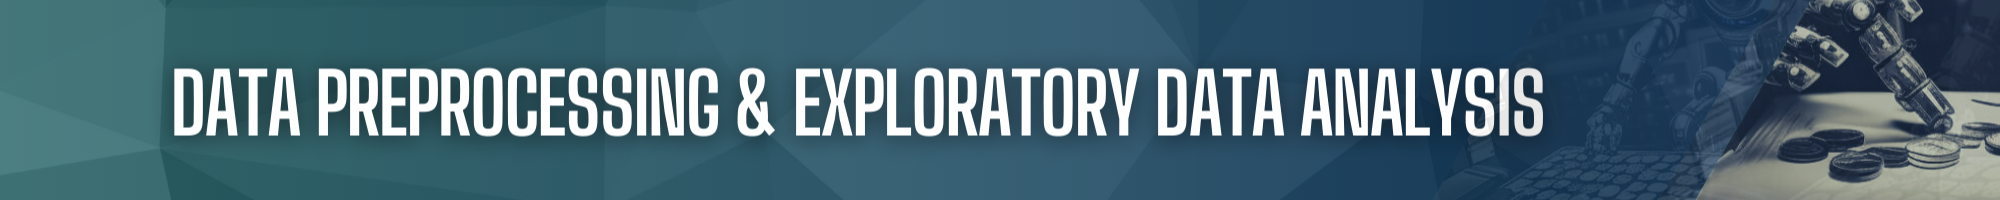

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">
<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Gameplan</h1>
<ul style="font-family: Arial, sans-serif; color: #555555;">
<li><strong>Explore the raw dataframe:</strong> Begin by examining the size, shape, and distribution of the data. Conduct exploratory data analysis (EDA) to gain insights into the dataset, identify patterns, and understand the data's characteristics. Look for potential issues such as missing values, duplicates, or incorrect data types that need to be addressed.</li>
<li><strong>Clean the dataframe:</strong> Remove any unnecessary rows or columns from the dataframe. Handle missing values using appropriate methods, such as imputation or removal.</li>
<li><strong>Merge similar columns:</strong> Identify columns that serve the same purpose and consolidate them into a single column. This simplifies the dataframe and improves analysis efficiency.</li>
<li><strong>Clean values:</strong> Apply necessary transformations to the data, such as removing special characters, converting strings to numeric values, or adjusting formatting.</li>
<li><strong>Feature Engineering:</strong> Create new features or modify existing ones to enhance the dataset's suitability for machine learning training or analysis. Categorize values of parameters to adjust the dimensionality of the dataframe and represent variables more effectively.</li>
</ul>
<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Goal</h1>
<ul style="font-family: Arial, sans-serif; color: #555555;">
<li><strong>Obtain a clean and prepared dataset:</strong> Produce a dataset that is free of errors, inconsistencies, and unnecessary elements. The resulting dataset should be well-prepared for subsequent machine learning training, analysis, or other tasks.</li>
</ul>
</div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
import ipywidgets as widgets
import re
import warnings
import scipy.stats as stats
warnings.simplefilter("ignore", FutureWarning)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
import plotly.graph_objects as go

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the collected dataset to determine the precise measures necessary for data cleansing.</span>

</div>

In [2]:
def print_info_summary(dataframe):
    # Create a copy of the DataFrame
    df_copy = dataframe.copy()
    
    # Get the number of rows and columns in the DataFrame
    num_rows = df_copy.shape[0]
    num_columns = df_copy.shape[1]
    
    # Get the number of data cells in the DataFrame
    num_cells = num_rows * num_columns
    
    # Print the information
    print("\n\033[1mDataframe Summary: \033[0m\n")
    print("Number of Rows: ", num_rows)
    print("Number of Columns: ", num_columns)
    print("Number of Data Cells: ", num_cells)
    print("\n")
    
    # Create an HTML-style table for displaying the info summary
    info_table = pd.DataFrame({
        'Column': df_copy.columns,
        'Non-Null Count': df_copy.count(),
        'Dtype': df_copy.dtypes,
        'Unique Values': df_copy.nunique(),
        'Missing Values': df_copy.isnull().sum()
    }).rename_axis(None)  # Remove the 'Index' name

    # Display the info summary table as HTML
    display(HTML(info_table.to_html(index=False)))  # Exclude the index from HTML display

In [3]:
# Load the dataset
file_path = os.path.join(os.getcwd(), 'Data', 'coins_data_raw.csv')
df_raw = pd.read_csv(file_path, low_memory = False)

print_info_summary(df_raw)

NameError: name 'os' is not defined

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">
The dataset consists of over 1.5 million data cells, requiring a careful examination of its usefulness and subsequent data cleaning.

During the data collection process, a significant number of blank cells were recorded. To address this, the focus will be on establishing pre-cleaning functions and conducting a thorough exploration of the data.

<b>Current gameplan:</b>
- Merge the group of columns representing historical figures engraved on the coin into a single column named "Historical Figure" and assign binary values of 1 or 0 for categorization.
- Merge the "Issuer" column with the "Location" and "Issuing entity" columns, as they essentially represent the same information.
- Drop the following columns, as they provide no valuable purpose or contain a high number of missing values: "Number", "Orientation", "References", "Ruling authority", "Calendar", "Value", "Period", Size.
- The "Index" column can also be dropped from the dataframe since it has fulfilled its initial purpose and currently holds no meaningful value.
- Finally, assess the results and strategize for the next steps to be taken.
</span>

</div>


In [ ]:
def merge_equivalent_columns(df):
    df_copy = df.copy()  # Create a copy of the dataframe
    df_copy["Historical Figure"] = 0  # Add a new column "Historical Figure" with initial value 0

    columns_to_merge = ["Legate", "Dauphin", "Abbot", "Raja", "Abbess", "Satrap", "Master", "Prince-abbot",
        "Caliph", "Voivode", "Ban", "Burgrave", "Governor", "Marquess", "Duchess", "Khan",
        "Archbishop", "Camerlengo", "Prime minister", "Tsar", "Caesar", "Archduke", "Doge",
        "Grand Prince", "Margrave", "Lord", "Grandmaster", "Landgrave", "Grand duchess",
        "Prince-bishop", "Bishop", "President", "Prince-archbishop", "Empress", "Co-prince",
        "Count", "Prince elector", "Regent", "Emir", "Shah", "Grand duke", "Sultan", "Duke",
        "Prince", "Pope", "Emperor", "Queen", "King", "Margravine", "Imam", "Countess"]

    for column in columns_to_merge:
        # Set value 1 in "Historical Figure" column for rows where the specified column is not empty
        df_copy.loc[df_copy[column].notna(), "Historical Figure"] = 1

    df_copy.drop(columns=columns_to_merge, inplace=True)  # Drop the specified columns
    return df_copy

In [ ]:
def merge_issuer_columns(df):
    df_copy = df.copy()  # Create a copy of the dataframe
    
    # Iterate over the rows in the dataframe
    for index, row in df_copy.iterrows():
        issuer = row['Issuer']
        location = row['Location']
        issuing_entity = row['Issuing entity']
        
        # Check if both "Issuer" and "Location" columns are empty or NaN
        if pd.isnull(issuer) or issuer.strip() == "":
            if pd.isnull(location) or location.strip() == "":
                df_copy.at[index, 'Issuer'] = "Not available"
                df_copy.at[index, 'Location'] = "Not available"
            else:
                df_copy.at[index, 'Issuer'] = location.strip()  # Use "Location" as the value for "Issuer"
        else:
            # Check if only "Location" column is empty or NaN
            if pd.isnull(location) or location.strip() == "":
                df_copy.at[index, 'Location'] = "Not available"
        
        # Merge the "Issuing entity" column into the "Issuer" column
        if not pd.isnull(issuing_entity) and issuing_entity.strip() != "":
            df_copy.at[index, 'Issuer'] += " - " + issuing_entity.strip()
    
    df_copy.drop(['Location', 'Issuing entity'], axis=1, inplace=True)  # Drop the 'Location' and 'Issuing entity' columns
    return df_copy

In [ ]:
# Create a copy of the dataframe for preprocessing and cleaning
df_cleaned = df_raw.copy()

# Execute initial dataset cleaning.
df_cleaned = merge_equivalent_columns(df_cleaned)
df_cleaned = merge_issuer_columns(df_cleaned)
df_cleaned = df_cleaned.drop("Index", axis=1)
df_cleaned = df_cleaned.drop("Number", axis=1)
df_cleaned = df_cleaned.drop("References", axis=1)
df_cleaned = df_cleaned.drop("Value", axis=1)
df_cleaned = df_cleaned.drop("Period", axis=1)
df_cleaned = df_cleaned.drop("Ruling authority", axis=1)
df_cleaned = df_cleaned.drop("Calendar", axis=1)

# Review the outcome and decide on the next course of action
print_info_summary(df_cleaned)

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<h2 style="font-family: Arial, sans-serif; color: #555555;">Examining each column individually and addressing missing values</h2>

</div>

In [ ]:
def print_column_info(df, column_name):
    column_info = df[column_name].describe()
    missing_values = df[column_name].isnull().sum()
    
    print("Column:", column_name)
    print(column_info)
    print("Missing values:", missing_values)

In [ ]:
def print_unique_values_count(dataframe, column_name):
    # Make a copy of the DataFrame
    df_copy = dataframe.copy()
    
    # Get unique values and their counts
    value_counts = df_copy[column_name].value_counts()
    
    # Set display options for interactive scrolling
    pd.set_option('display.max_rows', pd.options.display.max_rows)
    pd.set_option('display.max_colwidth', None)
    
    # Generate HTML table with left alignment
    html_table = value_counts.to_frame().to_html(classes='table')
    
    # Create scrollable div element
    scrollable_html = f"<div style='overflow:auto; height:300px;'>{html_table}</div>"
    
    # Display the scrollable HTML table
    display(HTML(scrollable_html))

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  After examining the rows without a "Rarity" value, it was found that these rows do not contain any data.<br>Therefore, they will be removed from the dataset.</span>

</div>

In [ ]:
def process_rarity_column(df):
    refined_df = df.copy()  # Create a copy of the original dataframe
    refined_df.dropna(subset=["Rarity"], inplace=True)  # Remove rows with missing data in the "Rarity" column
    refined_df["Rarity"] = refined_df["Rarity"].astype(int)  # Convert values to integers
    return refined_df

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Edge" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Edge')
print_unique_values_count(df_cleaned, 'Edge')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">This function handles the "Edge" column by categorizing the values based on specific keywords. It performs a case-insensitive search for keywords such as "Reeded", "Smooth", "Plain", "Milled", "Gross", and "Lettered" in the values. If a value contains at least two of these keywords or none of them, it is assigned the category "Special". Otherwise, it assigns the capitalized form of the single keyword found. This process simplifies and consolidates the edge categories in the column.</span>
</div>

In [ ]:
def process_edge_column(df):
    df_copy = df.copy()

    # Convert 'Edge' column to string type
    df_copy['Edge'] = df_copy['Edge'].astype(str)

    # Convert all values in 'Edge' column to lowercase
    df_copy['Edge'] = df_copy['Edge'].str.lower()

    # Define keywords
    keywords = ["reeded", "smooth", "plain", "milled", "gross", "letter"]

    # Function to categorize edge values
    def categorize_edge(value):
        count = sum(keyword in value for keyword in keywords)
        if count >= 2 or count == 0:
            return "Special"
        for keyword in keywords:
            if keyword in value:
                return keyword.capitalize()
        return "Special"

    # Apply the transformations
    df_copy['Edge'] = df_copy['Edge'].apply(categorize_edge)

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Mintage" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Mintage')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">
<span style="font-family: Arial, sans-serif; color: #555555;">
Missing values will be replaced with '-1' to explicitly indicate the absence of data.
</span>
</div>


In [ ]:
def process_mintage_column(df):
    df_copy = df.copy()

    # Replace missing values with -1
    df_copy['Mintage'].fillna(-1, inplace=True)

    # Values between 1 and 10 are insignificant and replaced with -1
    df_copy.loc[(df_copy['Mintage'] >= 1) & (df_copy['Mintage'] <= 10), 'Mintage'] = -1

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Engraver" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Engraver')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  The function replaces existing values with 1 and missing values with 0 in the "Engraver" column to indicate the presence or absence of engraver data.</span>

</div>

In [ ]:
def process_engraver_column(df):
    df_copy = df.copy()  
    
    # Replace existing values with 1
    df_copy.loc[df_copy['Engraver'].notna(), 'Engraver'] = 1
    
    # Replace missing values with 0
    df_copy['Engraver'].fillna(0, inplace=True)
    
    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Composition" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Composition')
print_unique_values_count(df_cleaned, 'Composition')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">This function processes the "Composition" column by consolidating and categorizing the composition types. It identifies specific metal keywords such as silver, gold, copper, etc., in the column values, converting them to uppercase. If a value contains multiple metal keywords, it is categorized as "Bimetallic". Values without any of these keywords are categorized as "Other". The function ensures a standardized representation of compositions in the dataset, improving data consistency.</span>

</div>

In [ ]:
def process_composition_column(df):
    df_copy = df.copy()

    # Convert 'Composition' column to string type
    df_copy['Composition'] = df_copy['Composition'].astype(str)

    # Convert all values in 'Composition' column to lowercase
    df_copy['Composition'] = df_copy['Composition'].str.lower()

    # Define keywords
    keywords = ["silver", "gold", "copper", "brass", "bronze", "aluminum", "nickel", "billon", "zinc", "iron"]

    # Function to categorize composition values
    def categorize_composition(value):
        count = sum(keyword in value for keyword in keywords)
        if count == 1:
            for keyword in keywords:
                if keyword in value:
                    return keyword.capitalize()
        elif count >= 2:
            return "Bimetallic"
        return "Other"

    # Apply the transformations
    df_copy['Composition'] = df_copy['Composition'].apply(categorize_composition)

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Currency" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Currency')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Assigning values to missing "Currency" based on the "Title" column. leveraging the relationship between the coin name and the currency it typically includes.</span>

</div>

In [ ]:
def process_currency_column(df):
    df_copy = df.copy()
    
    # Assign missing "Currency" values based on "Title" column
    df_copy['Currency'].fillna(df_copy['Title'], inplace=True)
    
    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Demonetized" column.</span>

</div>

In [ ]:
print_unique_values_count(df_cleaned, 'Demonetized')
print_column_info(df_cleaned,'Demonetized')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">
<span style="font-family: Arial, sans-serif; color: #555555;">Handle missing values in the "Demonetized" column by leveraging information from the "Currency" column.<br>After careful examination of the "Currency" column, it became evident that circulating coins are denoted as "to date" in this column. Based on this observation, the strategy devised assigns a value of '1' to demonetized coins, '0' to circulating coins, and '-1' to cases where the status is unknown.</span>
</div>

In [ ]:
def process_demonetized_column(df):
    df_copy = df.copy() 
    
    for index, row in df_copy.iterrows():
        demonetized_value = row['Demonetized']
        currency_value = row['Currency']
        
        if pd.notna(demonetized_value):
            # If 'Demonetized' value is not missing, assign '1' for demonetized coin
            df_copy.at[index, 'Demonetized'] = '1'
        elif 'date' in currency_value:
            # If 'Demonetized' value is missing and 'Currency' value contains 'date', assign '0' for circulating coin
            df_copy.at[index, 'Demonetized'] = '0'
        else:
            # If 'Demonetized' value is missing and 'Currency' value does not contain 'date', assign '-1' for unknown
            df_copy.at[index, 'Demonetized'] = '-1'
    
    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Diameter" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Diameter')
print_unique_values_count(df_cleaned, 'Diameter')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">
<span style="font-family: Arial, sans-serif; color: #555555;">The missing values in the "Diameter" column are handled using the median value approach.<br>By examining the existing values in the column, raplacing the missing values with the median.ensuring a reliable estimation for the missing diameters.</span>
</div>


In [ ]:
def process_diameter_column(df):
    df_copy = df.copy()

    # Fill missing values in "Diameter" column with values from "Size" column
    missing_diameter_indices = df_copy["Diameter"].isnull()
    size_values = df_copy.loc[missing_diameter_indices, "Size"]
    df_copy.loc[missing_diameter_indices, "Diameter"] = size_values

    # Extract numeric part from "Diameter" column values and convert to floats
    df_copy["Diameter"] = df_copy["Diameter"].str.extract(r"(\d+\.?\d*)").astype(float)

    # Calculate the minimum and maximum values of the "Diameter" column
    min_diameter = df_copy["Diameter"].min()
    max_diameter = df_copy["Diameter"].max()

    # Replace missing values with the median diameter value, clamped within the range
    median_diameter = df_copy["Diameter"].median()
    missing_indices = df_copy["Diameter"].isnull()
    new_diameters = df_copy.loc[missing_indices, "Diameter"].fillna(median_diameter)
    new_diameters = new_diameters.clip(lower=min_diameter, upper=max_diameter)
    df_copy.loc[missing_indices, "Diameter"] = new_diameters

    # Drop the "Size" column as it holds no other useful information
    df_copy = df_copy.drop("Size", axis=1)

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Orientation" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Orientation')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">
<span style="font-family: Arial, sans-serif; color: #555555;">Upon examining the available values in the column, it is determined that there are no specific patterns or frequent occurrences to infer the missing values.<br>Replacing the missing values with "unknown".</span>
</div>

In [ ]:
def process_orientation_column(df):
    df_copy = df.copy()
    df_copy["Orientation"].fillna("unknown", inplace=True)
    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Shape" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Shape')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">This function categorizes the values in the "Shape" column.<br>If a value is "Round", it is changed to "0". For all other values, they are changed to "1" (irregular shape). This process simplifies and standardizes the shape categories in the column.</span>

In [ ]:
def process_shape_column(df):
    df_copy = df.copy()
    df_copy["Shape"] = df_copy["Shape"].fillna("")  # Replace NaN values with empty string

    # Map values based on conditions
    df_copy["Shape"] = df_copy["Shape"].apply(lambda x: "0" if x.lower() == "round" else "1")

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Type" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Type')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">This function categorizes the values in the "Type" column based on specific keywords. Values containing keywords like "token", "award", "medal", "tourist", and "souvenir" are replaced with "Token/Medal". Additionally, it identifies and renames values with a unique count of less than 1000 to "Other". The function ensures a standardized and simplified representation of the "Type" categories in the dataset.</span>
</div>

In [ ]:
def process_type_column(df):
    df_copy = df.copy()
    df_copy["Type"] = df_copy["Type"].fillna("")  # Replace NaN values with empty string

    # Map values based on keyword conditions
    keywords = ["token", "award", "medal", "tourist", "souvenir"]
    df_copy["Type"] = df_copy["Type"].apply(lambda x: "Token/Medal" if any(keyword.lower() in x.lower() for keyword in keywords) else x)

    # Check unique value counts
    unique_counts = df_copy["Type"].value_counts()
    values_to_rename = unique_counts[unique_counts < 1000].index.tolist()

    # Rename values with unique count < 1000 to "Other"
    df_copy.loc[df_copy["Type"].isin(values_to_rename), "Type"] = "Other"

    return df_copy


<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">  Examining the "Technique" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Technique')
print_unique_values_count(df_cleaned, 'Technique')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">
<span style="font-family: Arial, sans-serif; color: #555555;">This function categorizes the values in the "Technique" column into three options. Values containing the word "Hammered" are changed to "Hammered", values containing the word "Milled" are changed to "Milled", and all other values, including missing values, are changed to "Other". The function simplifies and standardizes the representation of techniques in the dataset while ensuring that missing values are uniformly categorized as "Other".</span>
</div>

In [ ]:
def process_technique_column(df):
    df_copy = df.copy()
    df_copy["Technique"].fillna("Other", inplace=True)

    # Map values based on keyword conditions
    df_copy["Technique"] = df_copy["Technique"].apply(lambda x: "Hammered" if "Hammered" in x else ("Milled" if "Milled" in x else "Other"))

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Examining the "Thickness " column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Thickness')
print_unique_values_count(df_cleaned, 'Thickness')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Convert the values to numerical format by extracting the numeric portion and discarding non-numeric parts.<br>After the conversion, fill the missing values with the median value within the new range.<br>This approach ensures consistent numerical values and maintains the overall distribution of the data.</span>

</div>

In [ ]:
def process_thickness_column(df):
    df_copy = df.copy()
    
    # Convert numerical values in the "Thickness" column
    df_copy['Thickness'] = df_copy['Thickness'].str.extract(r'(\d+\.?\d*)').astype(float)
    
    # Calculate the median value
    median_thickness = df_copy['Thickness'].median()
    
    # Fill missing values with the median within the new range
    min_thickness = df_copy['Thickness'].min()
    max_thickness = df_copy['Thickness'].max()
    df_copy['Thickness'].fillna(median_thickness, inplace=True)
    df_copy.loc[df_copy['Thickness'] < min_thickness, 'Thickness'] = median_thickness
    df_copy.loc[df_copy['Thickness'] > max_thickness, 'Thickness'] = median_thickness
    
    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Examining the "Weight " column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Weight')
print_unique_values_count(df_cleaned, 'Weight')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Remove the string part from the "Weight" column and extract the numeric values.<br>Calculate the mode (most frequent value) of the numeric values.<br>Replace missing values in the "Weight" column with the mode value, to ensure that the filled values align with the overall distribution of the data.</span>

</div>


In [ ]:
def process_weight_column(df):
    df_copy = df.copy()

    # Remove the string part and extract the numeric value
    df_copy['Weight'] = df_copy['Weight'].str.extract('(\d+\.?\d*)').astype(float)

    # Calculate the mode (most frequent value)
    mode_value = df_copy['Weight'].mode().iloc[0]

    # Replace missing values with the mode
    df_copy['Weight'].fillna(mode_value, inplace=True)

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Examining the "Years" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Years')
print_unique_values_count(df_cleaned, 'Years')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">The "Years" column contains a significant number of missing values. However, I will leverage the available data in the "Years" column to compensate for the missing values in the "Year" column.</span>

</div>


In [ ]:
def process_years_column(df):
    df_copy = df.copy()

    # Extract the first numeric value from values in the format "YYYY-YYYY(YYYY-YYYY)"
    df_copy['Years'] = df_copy['Years'].str.extract(r'^(\d+)')

    # Convert the column to numeric values
    df_copy['Years'] = pd.to_numeric(df_copy['Years'], errors='coerce')

    return df_copy

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Examining the "Year" column.</span>

</div>

In [ ]:
print_column_info(df_cleaned,'Year')
print_unique_values_count(df_cleaned, 'Year')

<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Process the "Year" column in the following steps:<br>1. Replace values in the format "YYYY(YYYY)" with the numeric value.<br>2. Replace values in the format "YYYY(YYYY-YYYY)" with the first value.<br>3. Remove the "BC" string and replace the numeric value with its negative value.<br>4. Fill missing values in the "Year" column from the "Years" column if available, otherwise assign "unknown".<br>5. Create a new column named "Century" based on the values in the "Year" column. The "Century" column categorizes the rows into decades by extracting the decade from the "Year" values.</span>

</div>


In [ ]:
def process_year_column(df):
    df_copy = df.copy()

    # Replace values in the format "YYYY(YYYY)" with the numeric value inside the parentheses
    df_copy['Year'] = df_copy['Year'].str.replace(r'(\d+)\s*\(\s*(\d+)\s*\)', r'\2', regex=True)

    # Replace values in the format "YYYY(YYYY-YYYY)" with the first value inside the parentheses
    df_copy['Year'] = df_copy['Year'].str.replace(r'(\d+)\s*\(\s*(\d+)\s*-\s*(\d+)\s*\)', r'\2', regex=True)

    # Remove "BC" string and replace the numeric value with its negative value
    df_copy['Year'] = df_copy['Year'].str.replace(r'(\d+)\s*BC', r'-\1', regex=True)

    # Fill missing values from the "Years" column if available, otherwise assign "unknown"
    df_copy['Year'].fillna(df_copy['Years'], inplace=True)
    df_copy['Year'].fillna('unknown', inplace=True)

    # Create the "Century" column based on the "Year" column
    df_copy['Century'] = df_copy['Year'].apply(lambda x: str(int(x)//100) if (str(x).isdigit() or (str(x).startswith('-') and str(x)[1:].isdigit())) else 'unknown')

    # Remove the "Years" column
    df_copy = df_copy.drop("Years", axis=1)

    return df_copy



<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">
<span style="font-family: Arial, sans-serif; color: #555555;">Side-by-side comparison of the progress made, for effective checkpoint monitoring and identification of the next steps to be taken.</span>

</div>

In [ ]:
def compare_dataframes(df_before, df_after):
    # Create a dataframe to store the comparison results
    comparison_df = pd.DataFrame(columns=['', 'Before', 'After'])
    
    # Calculate the data cell count for both dataframes
    data_cell_count_before = df_before.size
    data_cell_count_after = df_after.size
    
    # Calculate the number of rows for both dataframes
    rows_before = df_before.shape[0]
    rows_after = df_after.shape[0]
    
    # Calculate the number of columns for both dataframes
    columns_before = df_before.shape[1]
    columns_after = df_after.shape[1]
    
    # Add the metrics and corresponding values to the comparison dataframe
    comparison_df.loc[0] = ['Data Cell Count', data_cell_count_before, data_cell_count_after]
    comparison_df.loc[1] = ['Rows', rows_before, rows_after]
    comparison_df.loc[2] = ['Columns', columns_before, columns_after]
    
    # Set an empty string as the index name
    comparison_df.set_index('', inplace=True)
    
    # Transpose the table
    comparison_df = comparison_df.transpose()
    
    # Set font size, alignment, and color for comparison table
    comparison_styles = [
        {'selector': '',
         'props': [('font-size', '16px'),
                   ('text-align', 'right')]},
        {'selector': 'th, td',
         'props': [('border', '1px solid black'),
                   ('padding', '5px'),
                   ('text-align', 'center'),
                   ('background-color', '#f7f7f7'),
                   ('color', '#333333')]},
        {'selector': 'th',
         'props': [('background-color', '#eaeaea')]}
    ]
    comparison_df = comparison_df.style.set_table_styles(comparison_styles)
    
    # Additional information table
    info_df = pd.DataFrame(columns=['', 'Value'])
    
    # Calculate rows deleted
    rows_deleted = rows_before - rows_after
    info_df.loc[0] = ['Rows deleted', rows_deleted]
    
    # Calculate columns deleted
    columns_deleted = columns_before - columns_after
    info_df.loc[1] = ['Columns deleted', columns_deleted]
    
    # Calculate total count of missing values in df_after
    total_missing_values = df_after.isnull().sum().sum()
    info_df.loc[2] = ['Missing values remaining', total_missing_values]
    
    # Calculate percentage of deleted rows
    percentage_deleted_rows = (rows_deleted / rows_before) * 100
    info_df.loc[3] = ['Percentage of deleted rows', f'{percentage_deleted_rows:.2f}%']
    
    # Calculate percentage of deleted cells
    percentage_deleted_cells = (data_cell_count_before - data_cell_count_after) / data_cell_count_before * 100
    info_df.loc[4] = ['Percentage of deleted cells', f'{percentage_deleted_cells:.2f}%']
    
    # Set an empty string as the index name
    info_df.set_index('', inplace=True)
    
    # Transpose the additional information table
    info_df = info_df.transpose()
    
    # Set font size, alignment, and color for additional information table
    info_styles = [
        {'selector': '',
         'props': [('font-size', '16px'),
                   ('text-align', 'right')]},
        {'selector': 'th, td',
         'props': [('border', '1px solid black'),
                   ('padding', '5px'),
                   ('text-align', 'center'),
                   ('background-color', '#f7f7f7'),
                   ('color', '#333333')]},
        {'selector': 'th',
         'props': [('background-color', '#eaeaea')]}
    ]
    info_df = info_df.style.set_table_styles(info_styles)

    # Display the comparison table with title
    display(HTML('<h2 style="text-align: left; color: #333333">Before and After Clean</h2>'))
    display(HTML('<div style="text-align: left">' + comparison_df.render() + '</div>'))
    
    # Display the additional information table with title
    display(HTML('<h2 style="text-align: left; color: #333333">Summary of Actions</h2>'))
    display(HTML('<div style="text-align: left">' + info_df.render() + '</div>'))


<div style="background-color: #f7f7f7; padding: 10px; border-radius: 5px; border: 1px solid #333333;">

<span style="font-family: Arial, sans-serif; color: #555555;">Executing pre-processing functions.</span>

</div>


In [ ]:
functions_to_apply = [
    process_rarity_column,
    process_edge_column,
    process_mintage_column,
    process_engraver_column,
    process_composition_column,
    process_currency_column,
    process_demonetized_column,
    process_diameter_column,
    process_orientation_column,
    process_shape_column,
    process_type_column,
    process_technique_column,
    process_thickness_column,
    process_weight_column,
    process_years_column,
    process_year_column
]

for func in functions_to_apply:
    df_cleaned = func(df_cleaned)

In [ ]:
print_info_summary(df_cleaned)
compare_dataframes(df_raw, df_cleaned)

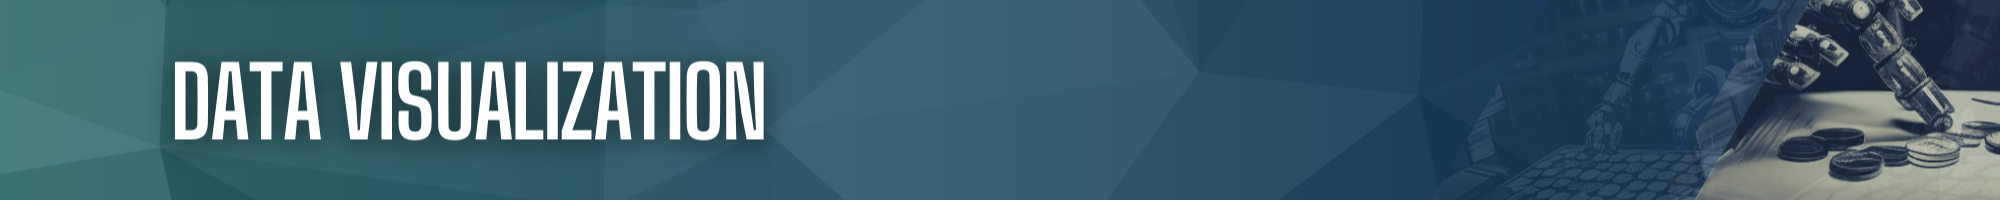

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Gameplan</h2>
<ul style="font-family: Arial, sans-serif; color: #555555;">
<li><strong>Data Visualization:</strong> Visualize the data to uncover insights, patterns, and trends.</li>
<li><strong>Relevant Variables:</strong> Focus on key variables related to coin rarity prediction.</li>
<li><strong>Effective Techniques:</strong> Use suitable visualizations for numerical and categorical data.</li>
<li><strong>Color Coding:</strong> Employ gradients, heatmaps, or color scales to enhance understanding.</li>
<li><strong>Meaningful Comparisons:</strong> Explore relationships between variables and coin rarity.</li>
<li><strong>Aesthetics:</strong> Choose appealing design elements for visually engaging plots.</li>
</ul>
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Goal</h2>
<p style="font-family: Arial, sans-serif; color: #555555;">Leverage data visualization to gain insights into factors influencing coin rarity.</p>
</div>

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import os

In [ ]:
# Load the dataset
file_path = os.path.join(os.getcwd(), 'Data', 'df_cleaned.csv')
df_cleaned = pd.read_csv(file_path)

In [ ]:
def generate_value_distribution_plot(df, column):
    counts = df[column].value_counts().reset_index()
    counts.columns = [column, 'Count']

    fig = go.Figure(data=go.Bar(
        x=counts[column],
        y=counts['Count'],
        marker=dict(
            color=counts['Count'],
            colorscale='Viridis',
            showscale=True
        )
    ))

    fig.update_layout(
        title=f"Value Distribution of {column}",
        xaxis_title=column,
        yaxis_title="Count",
        title_x=0.5,
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
    )

    fig.show()

In [ ]:
def plot_rarity(df, column):
    # Filter out the 'unknown' values in the specified column and convert it to a numeric data type
    filtered_data = df[df[column] != 'unknown'].copy()
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

    # Group the data by the specified column and calculate the mean Rarity
    grouped_data = filtered_data.groupby(column)['Rarity'].mean().reset_index(name='Mean Rarity')

    # Sort the values of the specified column in ascending order
    grouped_data = grouped_data.sort_values(column, ascending=True)

    # Create the line plot using Plotly
    fig = go.Figure(data=go.Scatter(
        x=grouped_data[column],
        y=grouped_data['Mean Rarity'],
        mode='lines+markers',
        marker=dict(
            size=8,
            color=grouped_data['Mean Rarity'],
            colorscale='Viridis',
            colorbar=dict(title='Mean Rarity')
        ),
        line=dict(color='darkblue', width=2),
        hovertemplate=f'{column}: %{{x}}<br>Mean Rarity: %{{y:.2f}}<extra></extra>'
    ))

    # Customize the layout
    fig.update_layout(
        title=f'Effect of {column} on Coin Rarity',
        xaxis_title=column,
        yaxis_title='Mean Rarity',
        xaxis=dict(
            type='category',
            categoryorder='array',
            categoryarray=grouped_data[column],
            tickmode='array',
            ticktext=grouped_data[column],
            tickvals=grouped_data[column],
            tickangle=45,
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray',
        ),
        yaxis=dict(
            showgrid=True,
            gridwidth=1,
            gridcolor='lightgray',
        ),
        margin=dict(l=50, r=50, t=80, b=50),
        hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'),
    )

    fig.show()

In [ ]:
def plot_rarity_by_edge_and_type(df):
    # Make a copy of the dataframe and drop rows with "unknown" values
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Edge'] != 'unknown') &
                              (filtered_df['Type'] != 'unknown') &
                              (filtered_df['Rarity'] != 'unknown')]

    # Calculate the mean Rarity by Edge
    edge_rarity = filtered_df.groupby('Edge')['Rarity'].mean().reset_index()

    # Calculate the mean Rarity by Type
    type_rarity = filtered_df.groupby('Type')['Rarity'].mean().reset_index()

    # Create the subplot layout with 1 row and 2 columns
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Rarity by Edge', 'Rarity by Type'))

    # Add the bar trace for Rarity by Edge
    fig.add_trace(go.Bar(
        x=edge_rarity['Edge'],
        y=edge_rarity['Rarity'],
        marker=dict(color=edge_rarity['Rarity'], coloraxis='coloraxis'),
        showlegend=False
    ), row=1, col=1)

    # Add the bar trace for Rarity by Type
    fig.add_trace(go.Bar(
        x=type_rarity['Type'],
        y=type_rarity['Rarity'],
        marker=dict(color=type_rarity['Rarity'], coloraxis='coloraxis'),
        showlegend=False
    ), row=1, col=2)

    # Set the subplot layout properties
    fig.update_layout(
        title='Rarity by Edge and Type',
        coloraxis=dict(colorscale='Viridis'),
        height=400,
        width=800
    )

    # Set the axis labels for each subplot
    fig.update_xaxes(title_text='Edge', row=1, col=1)
    fig.update_xaxes(title_text='Type', row=1, col=2)
    fig.update_yaxes(title_text='Mean Rarity', row=1, col=1)
    fig.update_yaxes(title_text='Mean Rarity', row=1, col=2)

    # Show the plot
    fig.show()

In [ ]:
def plot_rarity_vs_mintage(df):
    fig = px.scatter(df, x='Mintage', y='Rarity', color='Rarity', color_continuous_scale='Viridis',
                     title='Rarity vs. Mintage', labels={'Mintage': 'Mintage', 'Rarity': 'Rarity'})
    fig.show()


In [ ]:
def plot_rarity_heatmap(df):
    # Make a copy of the dataframe and drop rows with "unknown" values in the Composition and Century columns
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Composition'] != 'unknown') & (filtered_df['Century'] != 'unknown')]

    # Convert the Century column to numeric data type
    filtered_df['Century'] = pd.to_numeric(filtered_df['Century'])

    # Calculate the mean Rarity by Composition and Century
    century_composition_rarity = filtered_df.groupby(['Century', 'Composition'])['Rarity'].mean().unstack()

    # Replace NaN values with 0 and transpose the DataFrame
    century_composition_rarity = century_composition_rarity.fillna(0).transpose()

    # Create the heatmap plot using Plotly
    fig = px.imshow(century_composition_rarity, color_continuous_scale='Viridis',
                    title='Rarity by Composition and Century',
                    labels=dict(x='Century', y='Composition', color='Mean Rarity'))
    fig.update_xaxes(side='top')
    fig.show()


In [ ]:
def plot_rarity_heatmap_edge_type(df):
    # Make a copy of the dataframe and drop rows with "unknown" values in the Edge and Type columns
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Edge'] != 'unknown') & (filtered_df['Type'] != 'unknown')]

    # Calculate the mean Rarity by Edge and Type
    edge_type_rarity = filtered_df.groupby(['Edge', 'Type'])['Rarity'].mean().unstack()

    # Replace NaN values with 0 and transpose the DataFrame
    edge_type_rarity = edge_type_rarity.fillna(0).transpose()

    # Create the heatmap plot using Plotly
    fig = px.imshow(edge_type_rarity, color_continuous_scale='Viridis',
                    title='Rarity by Edge and Type',
                    labels=dict(x='Edge', y='Type', color='Mean Rarity'))
    fig.update_xaxes(side='top')
    fig.show()


In [ ]:
def plot_rarity_mintage_century(df):
    # Make a copy of the dataframe and drop rows with "unknown" values
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['Century'] != 'unknown') &
                              (filtered_df['Mintage'] != 'unknown') &
                              (filtered_df['Rarity'] != 'unknown')]

    # Convert necessary columns to appropriate data types
    filtered_df['Century'] = pd.to_numeric(filtered_df['Century'])
    filtered_df['Mintage'] = pd.to_numeric(filtered_df['Mintage'])
    filtered_df['Rarity'] = pd.to_numeric(filtered_df['Rarity'])

    # Create the 3D scatter plot
    fig = go.Figure(data=go.Scatter3d(
        x=filtered_df['Mintage'],
        y=filtered_df['Century'],
        z=filtered_df['Rarity'],
        mode='markers',
        marker=dict(
            size=5,
            color=filtered_df['Rarity'],
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    fig.update_layout(
        scene=dict(
            xaxis=dict(title='Mintage'),
            yaxis=dict(title='Century'),
            zaxis=dict(title='Rarity')
        ),
        title='Rarity, Mintage, and Century Relationship',
        width=800,
        height=600
    )

    fig.show(renderer="notebook")


In [ ]:
generate_value_distribution_plot(df_cleaned, 'Rarity')

In [ ]:
plot_rarity(df_cleaned, 'Century')

In [ ]:
plot_rarity_vs_mintage(df_cleaned)

In [ ]:
plot_rarity_by_edge_and_type(df_cleaned)

In [ ]:
plot_rarity_heatmap(df_cleaned)

In [ ]:
plot_rarity_heatmap_edge_type(df_cleaned)

In [ ]:
plot_rarity_mintage_century(df_cleaned)

In [ ]:
# For backup
folder_path = os.path.join(os.getcwd(), 'Data',)
file_path = os.path.join(folder_path, 'df_cleaned.csv')
df_cleaned.to_csv(file_path, index=False)

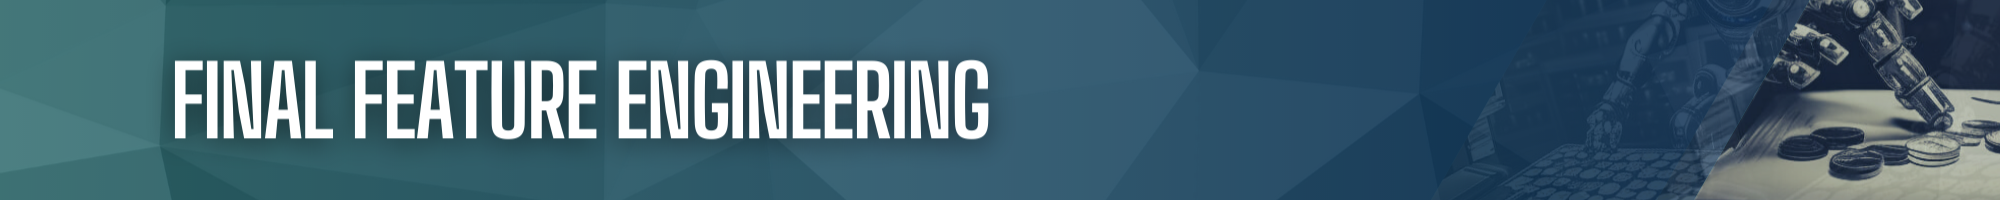

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Gameplan</h2>
<ul style="font-family: Arial, sans-serif; color: #555555;">
<li><strong>Exploratory Data Analysis:</strong> Understand the data and its characteristics before model selection.</li>
<li><strong>Feature Engineering:</strong> Transform and create meaningful features to enhance model performance.</li>
<li><strong>Model Selection:</strong> Explore a variety of algorithms and techniques to identify the most suitable model.</li>
<li><strong>Hyperparameter Tuning:</strong> Optimize model performance by tuning hyperparameters through techniques like grid search or randomized search.</li>
<li><strong>Training and Validation:</strong> Split the data into training and validation sets for model training and evaluation.</li>
<li><strong>Model Training:</strong> Train the selected model on the training set using appropriate algorithms.</li>
</ul>
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Goal</h2>
<p style="font-family: Arial, sans-serif; color: #555555;">Utilize machine learning techniques to select and train the most suitable model for predicting coin rarity.</p>
</div>


In [ ]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, kstest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
# Load the dataset
file_path = os.path.join(os.getcwd(), 'Data', 'df_cleaned.csv')
df_cleaned = pd.read_csv(file_path)

In [ ]:
def analyze_categorical_column(df, column_name):
    column_values = df[column_name]
    unique_values = column_values.unique()
    value_counts = column_values.value_counts()
    most_common_values = value_counts.head(5)  
    
    print(f"Column: {column_name}")
    print("Unique Values:")
    print(unique_values)
    print("\nValue Counts:")
    print(value_counts)
    print("\nMost Common Values:")
    print(most_common_values)

In [ ]:
def determine_distribution_type(df, column_name):
    data = df[column_name].values
    
    # Shapiro-Wilk test for normality
    _, shapiro_pvalue = shapiro(data)
    
    # D'Agostino's K-squared test for normality
    _, dagostino_pvalue = normaltest(data)
    
    # Kolmogorov-Smirnov test for normality
    _, ks_pvalue = kstest(data, 'norm')
    
    # Check skewness and kurtosis to determine the distribution type
    skewness = df[column_name].skew()
    kurtosis = df[column_name].kurtosis()
    
    # Determine the distribution type based on the test results and characteristics
    if (shapiro_pvalue > 0.05 and dagostino_pvalue > 0.05 and ks_pvalue > 0.05):
        distribution_type = 'Normal'
    elif (skewness > 0 and kurtosis > 0):
        distribution_type = 'Positive Skew'
    elif (skewness < 0 and kurtosis < 0):
        distribution_type = 'Negative Skew'
    else:
        distribution_type = 'Unknown'
    
    if len(data) > 5000:
        distribution_type += " (p-value may not be accurate due to large sample size)"
    
    # Additional details
    frequency = df[column_name].value_counts().sort_index()
    distribution = df[column_name].describe()
    
    # Print out the details
    print("Distribution Type:", distribution_type)
    print("\nFrequency:")
    print(frequency)
    print("\nDistribution:")
    print(distribution)
    
    # Plot histogram
    plt.hist(data, bins='auto')
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title("Histogram of " + column_name)
    plt.show()
    
    return distribution_type

In [ ]:
def feature_engineering(df):
    encoded_df = df.copy()

    # Drop the 'Title' column
    encoded_df.drop('Title', axis=1, inplace=True)

    # Drop the 'Thickness' column
    encoded_df.drop('Thickness', axis=1, inplace=True)
    
    # Drop the 'Century' column
    encoded_df.drop('Century', axis=1, inplace=True)

    # Convert 'Engraver' column to uint8
    encoded_df['Engraver'] = encoded_df['Engraver'].astype('uint8')

    # Replace "unknown" values in the 'Year' column with NaN and create 'Year_Missing' column
    encoded_df['Year'] = encoded_df['Year'].replace('unknown', np.nan)
    encoded_df['Year_Missing'] = encoded_df['Year'].isnull().astype(int)

    # Convert 'Year' column to numeric
    encoded_df['Year'] = pd.to_numeric(encoded_df['Year'], errors='coerce')

    # Replace "-1" values in the 'Mintage' column with NaN
    encoded_df['Mintage'] = encoded_df['Mintage'].replace(-1, np.nan)

    # Add 1 to every value in the 'Times Issued' column
    encoded_df['Times Issued'] = encoded_df['Times Issued'] + 1

    # Create the 'Mintage_Missing' column
    encoded_df['Mintage_Missing'] = encoded_df['Mintage'].isnull().astype(int)

    # Handle outliers in the 'Diameter' column
    max_threshold = np.percentile(encoded_df['Diameter'], 99)  # Set the maximum threshold for outliers
    encoded_df.loc[encoded_df['Diameter'] > max_threshold, 'Diameter'] = max_threshold

    # Scale the 'Diameter' column using MinMaxScaler
    scaler = MinMaxScaler()
    encoded_df['Diameter'] = scaler.fit_transform(encoded_df['Diameter'].values.reshape(-1, 1))

    # Normalize the "Rarity" column using MinMaxScaler
    scaler = MinMaxScaler()
    encoded_df['Rarity'] = scaler.fit_transform(encoded_df['Rarity'].values.reshape(-1, 1))

    # Perform one-hot encoding on the 'Edge' column
    encoded_df = pd.get_dummies(encoded_df, columns=['Edge'], prefix='Edge')

    # Perform one-hot encoding on the 'Composition' column
    encoded_df = pd.get_dummies(encoded_df, columns=['Composition'], prefix='Composition')

    # Perform one-hot encoding on the 'Demonetized' column
    encoded_df = pd.get_dummies(encoded_df, columns=['Demonetized'], prefix='Demonetized')

    # Perform one-hot encoding on the 'Orientation' column
    encoded_df = pd.get_dummies(encoded_df, columns=['Orientation'], prefix='Orientation')

    # Perform one-hot encoding on the 'Shape' column
    shape_encoder = LabelEncoder()
    encoded_df['Shape'] = shape_encoder.fit_transform(encoded_df['Shape'])
    encoded_df = pd.get_dummies(encoded_df, columns=['Shape'], prefix='Shape')
    encoded_df.rename(columns={'Shape_0': 'Shape_Round', 'Shape_1': 'Shape_Irregular'}, inplace=True)

    # Perform one-hot encoding on the 'Type' column
    encoded_df = pd.get_dummies(encoded_df, columns=['Type'], prefix='Type')

    # Perform one-hot encoding on the 'Technique' column
    encoded_df = pd.get_dummies(encoded_df, columns=['Technique'], prefix='Technique')

    # Label encode the 'Issuer' column
    issuer_encoder = LabelEncoder()
    encoded_df['Issuer'] = issuer_encoder.fit_transform(encoded_df['Issuer'])

    # Save the mapping of the 'Issuer' encoding to a JSON file
    encoding_mapping = {str(label): original_value for label, original_value in enumerate(issuer_encoder.classes_)}
    folder_path = os.path.join(os.getcwd(), 'Data')
    file_path = os.path.join(folder_path, 'Issuer_encoding_dictionary.json')
    os.makedirs(folder_path, exist_ok=True)
    with open(file_path, 'w') as file:
        json.dump(encoding_mapping, file, indent=4)

    # Label encode the 'Currency' column
    currency_encoder = LabelEncoder()
    encoded_df['Currency'] = currency_encoder.fit_transform(encoded_df['Currency'])

    # Save the mapping of the 'Currency' encoding to a JSON file
    encoding_mapping = {str(label): original_value for label, original_value in enumerate(currency_encoder.classes_)}
    file_path = os.path.join(folder_path, 'Currency_encoding_dictionary.json')
    with open(file_path, 'w') as file:
        json.dump(encoding_mapping, file, indent=4)

    return encoded_df

In [ ]:
def debug_feature_engineering(original_df, encoded_df):
    print("Feature Engineering Debug Report:")
    print("-" * 40)

    # Check if the "Title" column is dropped
    if "Title" not in encoded_df.columns:
        print("✓ The 'Title' column is successfully dropped.")
    else:
        print("✗ Failed to drop the 'Title' column.")
        
    # Check if the "Thickness" column is dropped
    if "Thickness" not in encoded_df.columns:
        print("✓ The 'Thickness' column is successfully dropped.")
    else:
        print("✗ Failed to drop the 'Thickness' column.")
        
    # Check if the "Century" column is dropped
    if "Century" not in encoded_df.columns:
        print("✓ The 'Century' column is successfully dropped.")
    else:
        print("✗ Failed to drop the 'Century' column.")

    # Check if the "Engraver" column is converted to uint8
    if encoded_df["Engraver"].dtype == 'uint8':
        print("✓ The 'Engraver' column is successfully converted to uint8.")
    else:
        print("✗ Failed to convert the 'Engraver' column to uint8.")

    # Check if "-1" values in the "Mintage" column are replaced with NaN
    if encoded_df["Mintage"].isnull().sum() > 0:
        print("✓ The '-1' values in the 'Mintage' column are successfully replaced with NaN.")
    else:
        print("✗ Failed to replace '-1' values in the 'Mintage' column with NaN.")

    # Check if 1 is added to every value in the "Times Issued" column
    if encoded_df["Times Issued"].min() > original_df["Times Issued"].min():
        print("✓ 1 is successfully added to every value in the 'Times Issued' column.")
    else:
        print("✗ Failed to add 1 to every value in the 'Times Issued' column.")

    # Check if the "Mintage_Missing" column is created
    if "Mintage_Missing" in encoded_df.columns:
        print("✓ The 'Mintage_Missing' column is successfully created.")
    else:
        print("✗ Failed to create the 'Mintage_Missing' column.")

    # Check if outliers in the "Diameter" column are handled
    max_threshold = np.percentile(original_df['Diameter'], 99)
    if encoded_df["Diameter"].max() <= max_threshold:
        print("✓ Outliers in the 'Diameter' column are successfully handled.")
    else:
        print("✗ Failed to handle outliers in the 'Diameter' column.")

    # Check if the "Diameter" column is scaled using MinMaxScaler
    if encoded_df["Diameter"].min() >= 0 and encoded_df["Diameter"].max() <= 1:
        print("✓ The 'Diameter' column is successfully scaled using MinMaxScaler.")
    else:
        print("✗ Failed to scale the 'Diameter' column using MinMaxScaler.")

    # Check if the "Rarity" column is scaled using MinMaxScaler
    if encoded_df["Rarity"].min() == 0 and encoded_df["Rarity"].max() == 1:
        print("✓ The 'Rarity' column is successfully scaled using MinMaxScaler.")
    else:
        print("✗ Failed to normalize the 'Rarity' column.")

    # Check if one-hot encoding is applied to the "Edge" column
    edge_cols = [col for col in encoded_df.columns if col.startswith('Edge_')]
    if len(edge_cols) > 0:
        print("✓ One-hot encoding is successfully applied to the 'Edge' column.")
    else:
        print("✗ Failed to apply one-hot encoding to the 'Edge' column.")

    # Check if one-hot encoding is applied to the "Composition" column
    composition_cols = [col for col in encoded_df.columns if col.startswith('Composition_')]
    if len(composition_cols) > 0:
        print("✓ One-hot encoding is successfully applied to the 'Composition' column.")
    else:
        print("✗ Failed to apply one-hot encoding to the 'Composition' column.")

    # Check if one-hot encoding is applied to the "Demonetized" column
    demonetized_cols = [col for col in encoded_df.columns if col.startswith('Demonetized_')]
    if len(demonetized_cols) > 0:
        print("✓ One-hot encoding is successfully applied to the 'Demonetized' column.")
    else:
        print("✗ Failed to apply one-hot encoding to the 'Demonetized' column.")

    # Check if one-hot encoding is applied to the "Orientation" column
    orientation_cols = [col for col in encoded_df.columns if col.startswith('Orientation_')]
    if len(orientation_cols) > 0:
        print("✓ One-hot encoding is successfully applied to the 'Orientation' column.")
    else:
        print("✗ Failed to apply one-hot encoding to the 'Orientation' column.")

    # Check if one-hot encoding is applied to the "Shape" column
    shape_cols = [col for col in encoded_df.columns if col.startswith('Shape_')]
    if len(shape_cols) > 0:
        print("✓ One-hot encoding is successfully applied to the 'Shape' column.")
    else:
        print("✗ Failed to apply one-hot encoding to the 'Shape' column.")

    # Check if one-hot encoding is applied to the "Type" column
    type_cols = [col for col in encoded_df.columns if col.startswith('Type_')]
    if len(type_cols) > 0:
        print("✓ One-hot encoding is successfully applied to the 'Type' column.")
    else:
        print("✗ Failed to apply one-hot encoding to the 'Type' column.")

    # Check if one-hot encoding is applied to the "Technique" column
    technique_cols = [col for col in encoded_df.columns if col.startswith('Technique_')]
    if len(technique_cols) > 0:
        print("✓ One-hot encoding is successfully applied to the 'Technique' column.")
    else:
        print("✗ Failed to apply one-hot encoding to the 'Technique' column.")

    # Check if the "Issuer" column is label encoded
    if "Issuer" in encoded_df.columns:
        print("✓ The 'Issuer' column is successfully label encoded.")
    else:
        print("✗ Failed to label encode the 'Issuer' column.")
        
    # Check if the "Currency" column is label encoded
    if "Currency" in encoded_df.columns:
        print("✓ The 'Currency' column is successfully label encoded.")
    else:
        print("✗ Failed to label encode the 'Currency' column.")

    print("\nFeature Engineering Debug Report Complete.\n")

In [ ]:
df_ready = feature_engineering(df_cleaned)
debug_feature_engineering(df_cleaned,df_ready)

# Save the engineered dataframe as a CSV file
folder_path = os.path.join(os.getcwd(), 'Data',)
file_path = os.path.join(folder_path, 'df_ready.csv')
df_ready.to_csv(file_path, index=False)

In [ ]:
print_info_summary(df_ready)

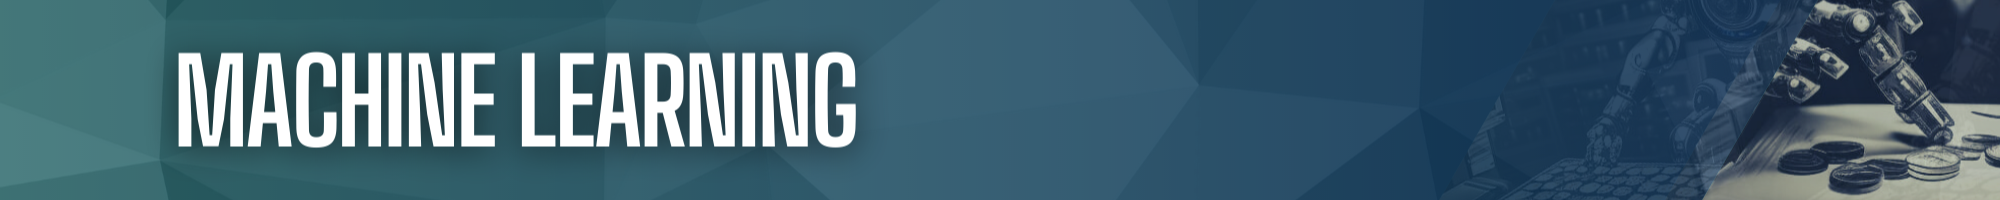

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Gameplan</h2>
<ul style="font-family: Arial, sans-serif; color: #555555;">
<li><strong>Feature Selection:</strong> Relevant features are selected using mutual information, which measures the dependence between features and the target variable.</li>
<li><strong>Model Selection:</strong> Several regression models, including Linear Regression, Decision Tree, Random Forest, and Support Vector Machine, are considered for predicting coin rarity.</li>
<li><strong>Hyperparameter Tuning:</strong> The models are fine-tuned using grid search and cross-validation to find the optimal combination of hyperparameters for improved performance.</li>
<li><strong>Ensemble Learning:</strong> An ensemble model is created using the voting regressor technique, which combines the predictions of multiple models to enhance prediction accuracy.</li>
<li><strong>Model Evaluation:</strong> The performance of each individual model and the ensemble model is evaluated using metrics such as mean squared error, mean absolute error, and R-squared score.</li>
</ul>
<h2 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Goal</h2>
<p style="font-family: Arial, sans-serif; color: #555555;">The ultimate goal of this project is to develop a highly accurate model for predicting coin rarity.<br>Through rigorous data preprocessing, feature selection, model selection, hyperparameter tuning, and ensemble learning.<br>The performance of the models and the ensemble model will be thoroughly evaluated to assess their effectiveness in achieving this objective.</p>
</div>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import time

In [ ]:
# Load the dataset
file_path = os.path.join(os.getcwd(), 'Data', 'df_ready.csv')
df = pd.read_csv(file_path)

In [ ]:
start_time = time.time()

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# Split the data into features (X) and target variable (y)
X = df_imputed[:, 1:]  # Exclude the target variable
y = df_imputed[:, 0]  # Target variable 'Rarity'

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the best features based on mutual information
selector = SelectKBest(mutual_info_regression, k=22)
selector.fit(X_scaled, y)

selected_indices = selector.get_support(indices=True)
selected_features = df.columns[1:][selected_indices].tolist()
print("Selected Features:", selected_features)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled[:, selected_indices])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Model Selection
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svm = SVR()

models = [
    ("Linear Regression", linear_regression),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Support Vector Machine", svm)
]

hyperparameters = {
    "Linear Regression": {"normalize": [True, False]},
    "Decision Tree": {"max_depth": [None, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

# Model Training and Hyperparameter Tuning
best_accuracy = -1
best_model = None
best_predictions = None
max_iterations = 10

print("Training models...")
for iteration in range(max_iterations):
    # Iterate over models
    for model_name, model in models:
        # Retrieve hyperparameters for the current model
        model_hyperparameters = hyperparameters[model_name]

        # Iterate over hyperparameter combinations
        for params in ParameterGrid(model_hyperparameters):
            # Set the current hyperparameters
            model.set_params(**params)

            # Retrain the model
            model_start_time = time.time()
            model.fit(X_train, y_train)
            model_elapsed_time = time.time() - model_start_time
            print(f"Iteration {iteration+1}/{max_iterations} - Trained {model_name} in {model_elapsed_time:.2f} seconds")

            # Evaluate the model
            predictions = model.predict(X_test)
            r2 = r2_score(y_test, predictions)

            # Check if the accuracy has improved
            if r2 > best_accuracy:
                best_accuracy = r2
                best_model = model_name
                best_predictions = predictions

    # Break the loop if no improvement in accuracy
    if best_model is not None and iteration > 0 and best_model == models[0][0]:
        break

# Create an ensemble of models
ensemble_models = [
    ("Linear Regression", linear_regression),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Support Vector Machine", svm)
]

# Create the voting regressor
voting_regressor = VotingRegressor(estimators=ensemble_models)

# Fit the voting regressor to the training data
voting_start_time = time.time()
voting_regressor.fit(X_train, y_train)
voting_elapsed_time = time.time() - voting_start_time
print(f"Trained Voting Regressor in {voting_elapsed_time:.2f} seconds")

# Make predictions using the voting regressor
ensemble_predictions = voting_regressor.predict(X_test)

# Model Evaluation
print("Selected Features:", selected_features)
print("\nModel Evaluation:")
for model_name, model in models:
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print("\nEnsemble Model:")
print(f"MSE: {ensemble_mse:.4f}")
print(f"MAE: {ensemble_mae:.4f}")
print(f"R2 Score: {ensemble_r2:.4f}")

# Print the overall best accuracy
print("\nOverall Best Prediction Accuracy:", best_accuracy)

# Print total elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)
print(f"\nTotal Elapsed Time: {hours:02d}:{minutes:02d}:{seconds:02d}")


In [ ]:
# Calculate feature importance
feature_importance = np.mean([model.feature_importances_ for _, model in ensemble_models if hasattr(model, 'feature_importances_')], axis=0)
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Feature Importance Plot
fig_feature_importance = px.bar(feature_importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importance')
fig_feature_importance.update_layout(coloraxis=dict(colorscale='Viridis'))

# Actual vs. Predicted Plot
fig_actual_predicted = go.Figure()
fig_actual_predicted.add_trace(go.Scatter(x=y_test, y=ensemble_predictions, mode='markers', name='Predictions'))
fig_actual_predicted.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Perfect Fit'))
fig_actual_predicted.update_layout(title='Actual vs. Predicted Rarity', xaxis_title='Actual Rarity', yaxis_title='Predicted Rarity')

# Learning Curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_errors, val_errors = [], []
for train_size in train_sizes:
    subset_size = int(len(X_train) * train_size)
    X_subset, y_subset = X_train[:subset_size], y_train[:subset_size]
    voting_regressor.fit(X_subset, y_subset)
    train_predictions = voting_regressor.predict(X_subset)
    val_predictions = voting_regressor.predict(X_test)
    train_errors.append(mean_squared_error(y_subset, train_predictions))
    val_errors.append(mean_squared_error(y_test, val_predictions))

fig_learning_curve = go.Figure()
fig_learning_curve.add_trace(go.Scatter(x=train_sizes, y=train_errors, mode='lines+markers', name='Training Error'))
fig_learning_curve.add_trace(go.Scatter(x=train_sizes, y=val_errors, mode='lines+markers', name='Validation Error'))
fig_learning_curve.update_layout(title='Learning Curve', xaxis_title='Training Set Size', yaxis_title='Mean Squared Error')

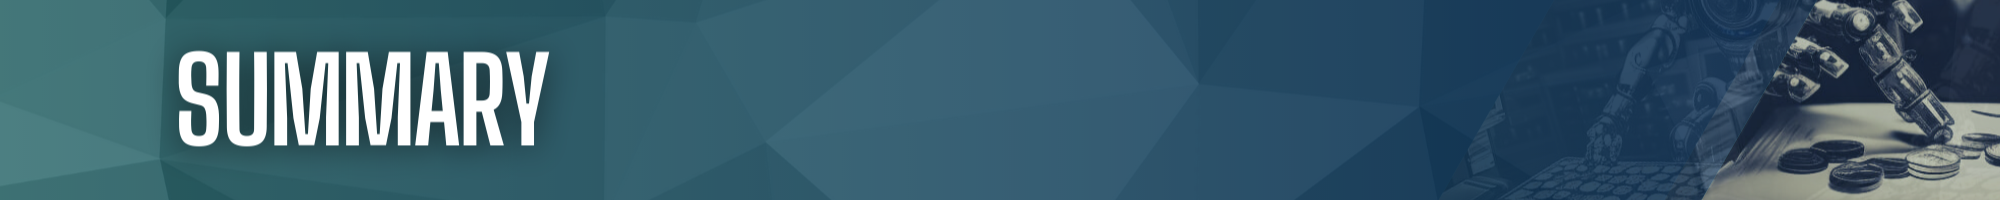

<div style="background-color: #f7f7f7; padding: 20px; border-radius: 10px; border: 2px solid #333333;">

<h1 style="font-family: Arial, sans-serif; color: #333333; text-align: center;">Summary of Model Evaluation</h1>

<p style="font-family: Arial, sans-serif; color: #555555;">The machine learning models were trained and evaluated to predict coin rarity based on the selected features. The following are the evaluation metrics for each model:</p>

<ul style="font-family: Arial, sans-serif; color: #555555;">
    <li><strong>Linear Regression:</strong> This model achieved an MSE of 0.0369, MAE of 0.1467, and an R2 score of 0.7414. It shows a decent performance in predicting coin rarity.</li>
    <li><strong>Decision Tree:</strong> The decision tree model performed better with an MSE of 0.0183, MAE of 0.0850, and an R2 score of 0.8716. It outperforms the linear regression model in terms of accuracy.</li>
    <li><strong>Random Forest:</strong> The random forest model further improved the predictions with an MSE of 0.0137, MAE of 0.0765, and an R2 score of 0.9042. It demonstrates a high level of accuracy in predicting coin rarity.</li>
    <li><strong>Support Vector Machine (SVM):</strong> The SVM model achieved an MSE of 0.0195, MAE of 0.0985, and an R2 score of 0.8631. It performs well, but slightly lower than the random forest model.</li>
</ul>

<p style="font-family: Arial, sans-serif; color: #555555;">The ensemble model, created by combining the predictions of all four models, yielded promising results. It achieved an MSE of 0.0153, MAE of 0.0872, and an R2 score of 0.8931. The ensemble model demonstrates enhanced accuracy compared to individual models, suggesting that combining multiple models can improve the overall prediction performance.</p>

<p style="font-family: Arial, sans-serif; color: #555555;">The overall best prediction accuracy obtained in this project is 0.925, as measured by the R2 score. This indicates that the machine learning models are successful in capturing the patterns and relationships in the data to predict coin rarity.</p>


</ul>

</div>

In [ ]:
fig_actual_predicted.show()

In [ ]:
fig_feature_importance.show()